# Wrapper class

Some games are not all Markov processes and you may want to store state in some buffer available to the agent. In this case, you have to wrap an existing environment

In [1]:
import gym
from typing import TypeVar
import random

Action = TypeVar('Action')

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon
    
    def action(self, action: Action) -> Action: # override the action step
        """Perform a random action at epsilon probability, otherwise just do the provided action
        """
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample() # inherited self.env from ActionWrapper
        return action
    
env = RandomActionWrapper(gym.make('CartPole-v0'))

## Apply the wrapper

You can use it normally now

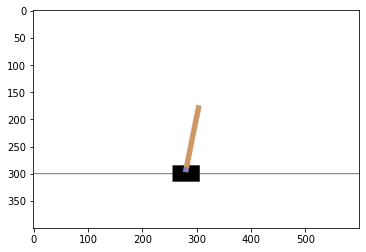

Reward got 10.0


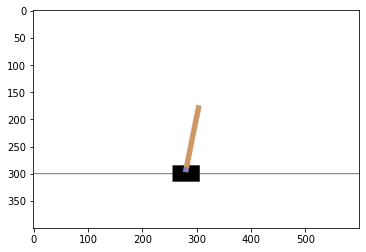

In [8]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

obs = env.reset()
total_reward = 0.0

while True:
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    obs, reward, done, _ = env.step(0)
    total_reward += reward
    
    if done:
        break

print(f'Reward got {total_reward}')
    

# Monitor

Use this class to record your results and save a video

In [3]:
%%bash

xvfb-run -s "-screen 0 640x480x24" python3 cartpole-vid.py

xvfb-run: error: Xvfb failed to start


CalledProcessError: Command 'b'\nxvfb-run -s "-screen 0 640x480x24" python3 cartpole-vid.py\n'' returned non-zero exit status 1.